# Is the traffic in Istanbul really lower in religious holidays?

Through this notebook, I will be trying to answer above question using new dataset released by Municipality of Istanbul (IBB).

You can reach the dataset from (I will also include .csv file in the repository):
https://data.ibb.gov.tr/en/dataset/trafik-indeks-raporu

**About the Traffic index dataset:**
The dataset provides the Traffic index (%) used in IBB traffic app. It has two columns index and time (including date and hour). Though they did not include information about the calculation of the index, from the app we can deduce that it is calculated similar to the traffic index of Google Maps and it shows traffic as percentage. In the data set min is 1% and max 81% both reasonable by being positive integers less than 100%.

The Dataset covers 5 minutes intervals between 1st of January 2019 00:00 to 4th of February 2020 11:05 am.
Since only less than 2 months in 2020 exists in the data, I will use only data for 2019 in analysis.  

Though it could be more informative to do the analysis in at least main roads level, the dataset only provides general Traffic index for Istanbul at a given time. 

**Further analysis to be done:**

Testing how much the traffic changes in 5 to 15 minutes intervals in typically rush hours in morning and evening. Is there a significant worsening of the traffic in such short intervals?

Testing whether winter or summer breaks for schools lead less traffic.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook
from scipy.stats import ttest_ind
import datetime
import calendar
import seaborn as sns

In [3]:
#Reading the datasets first one being traffic index and second one public holidays and preparing them to merge together
df1=pd.read_csv('Traffic_index.csv')
df2=pd.read_csv('holidays.csv',header=0)
df2=df2.rename(columns={'holidays':'date'})
df2['date']=pd.to_datetime(df2['date'])
df2.set_index('date',inplace=True)
df1['Date']=pd.to_datetime(df1['Date'])
df1=df1[df1['Date'].dt.year<2020]
df1['date'] = [d.date() for d in df1['Date']]
df1['time'] = [d.time() for d in df1['Date']]
df1.drop('Date',axis=1,inplace=True)
df1.set_index('date',inplace=True)

In [4]:
#summary statistics for traffic index dataset
df1.describe()

,Traffic Index
count,91643.000000
mean,25.359209
std,18.174336
min,1.000000
25%,8.000000
50%,26.000000
75%,40.000000
max,81.000000


In [5]:
#joining two datasets together to identify religious holidays in traffic data
df=df1.join(df2)
df.fillna(0)
#creating a new meta-dataframe containing average traffic index for each day rather than hourly data 
df_d=df.groupby(df.index).mean()
df_d.fillna(0)

,Traffic Index,time,religious
date,,,
2019-01-01,8,23:59:00,0.0
2019-01-01,8,23:54:00,0.0
2019-01-01,8,23:49:00,0.0
2019-01-01,9,23:44:00,0.0
2019-01-01,9,23:39:00,0.0
2019-01-01,9,23:34:00,0.0
2019-01-01,11,23:29:00,0.0
2019-01-01,9,23:24:00,0.0
2019-01-01,11,23:19:00,0.0


<IPython.core.display.Javascript object>


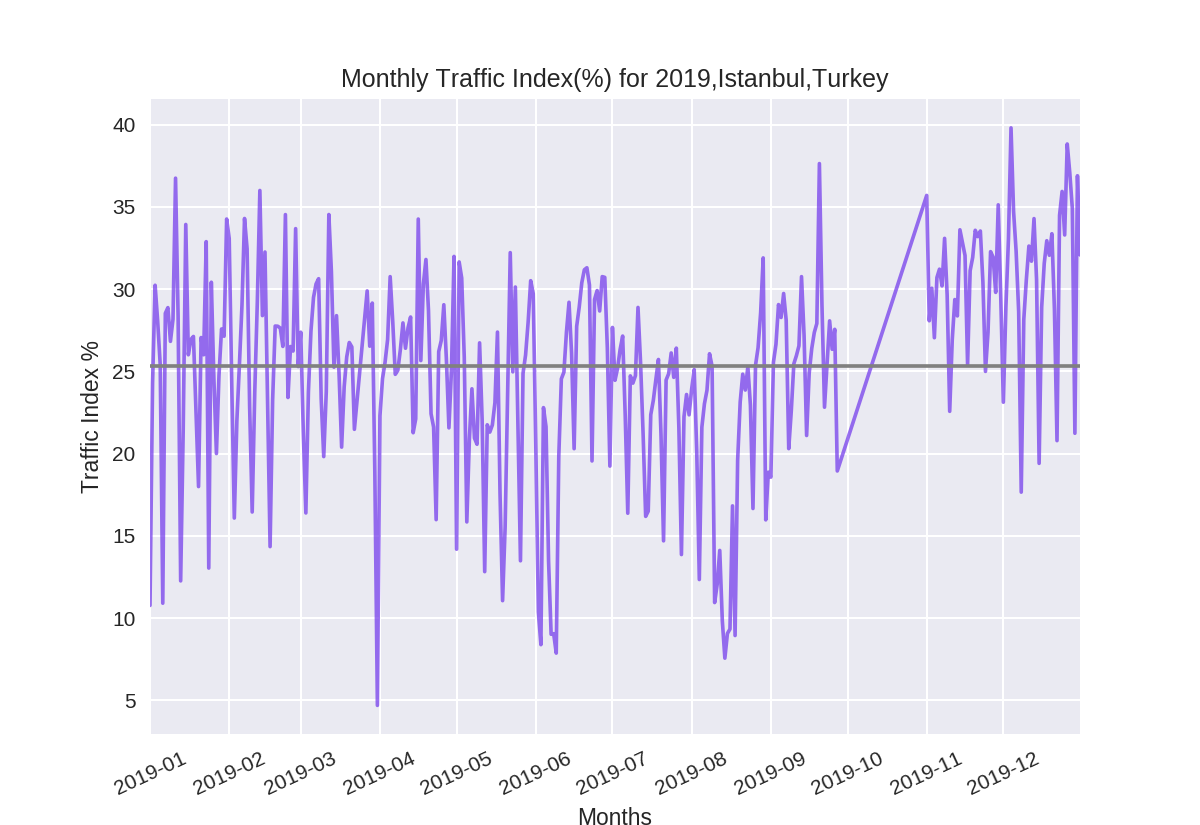

In [7]:
#Drawing a general line plot for daily average traffic index by months.
plt.figure()
plt.plot(df_d.index,df_d['Traffic Index'],color='#6e34eb',alpha=0.7)
ax=plt.gca()
for spine in ax.spines.values():
        spine.set_visible(False)
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='on', labelbottom='on')
ax.set_xlabel('Months')
ax.set_ylabel('Traffic Index %')
ax.set_xlim([datetime.date(2019,1,1),datetime.date(2019,12,31)])
axline=plt.axhline(df_d['Traffic Index'].mean(),color='grey')
x=ax.xaxis
for item in x.get_ticklabels():
    item.set_rotation(25)
plt.title('Monthly Traffic Index(%) for 2019,Istanbul,Turkey')
plt.show()

**Comments: <br>
The peaks and bottoms are due to difference between weekends and week days. <br>
October and December has above average traffic and from June to September the index seems lower than average in most of the days.**

<IPython.core.display.Javascript object>


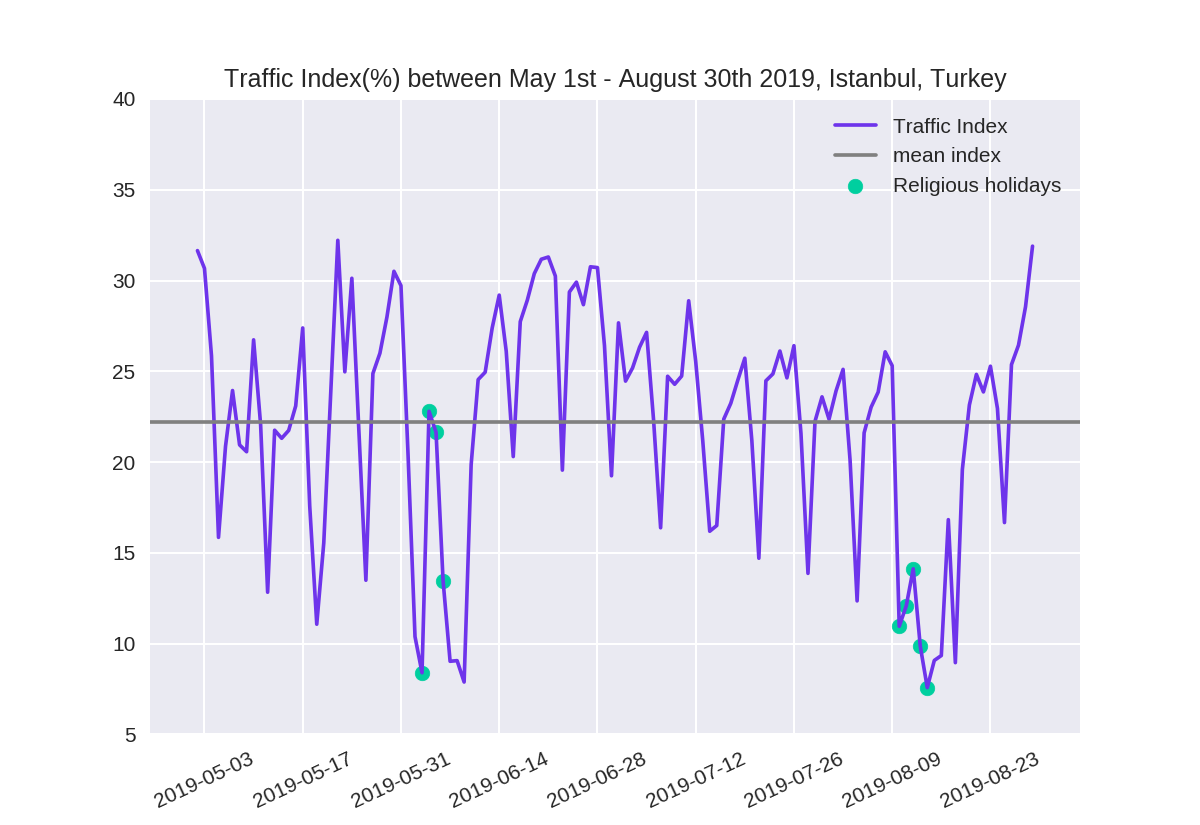

In [8]:
#Plotting traffic index between 1st of may and 30th of August to cover the feasting month of Ramadan 
#and the two religious holidays.
religious holidays 
plt.figure()
df_n=df_d[pd.Timestamp(2019,5,1)<df_d.index]
df_n=df_n[df_n.index<pd.Timestamp(2019,8,30)]
plt.plot(df_n.index,df_n['Traffic Index'],c='#6e34eb')
axline=plt.axhline(df_n['Traffic Index'].mean(),c='grey',label='mean index')
ax=plt.gca()
x=ax.xaxis
for item in x.get_ticklabels():
    item.set_rotation(25)
plt.tick_params(top='off', bottom='on', left='on', right='off', labelleft='on', labelbottom='on')
ax.set_ylim(5,40)
df_n['Religious holidays']=np.where(df_n['religious']==1,df_n['Traffic Index'],0)
plt.scatter(df_n.index,df_n['Religious holidays'],c='#00cf9f')
plt.title('Traffic Index(%) between May 1st - August 30th 2019, Istanbul, Turkey')
plt.legend()
plt.show()

**Comments: <br>
Eid al Fitr between Jun 3rd-6th has a very low traffic in the day before the holiday and around average in other days. <br>
Eid al Adha between Aug 10th-14th has substantially lower traffic rates for all days (around 10-15%)**

In [9]:
#Testing the null hypothesis that traffic in religious holidays is lower than normal days.
df_d=df_d.fillna(0)
df_h=df_d[df_d['religious']==1]
df_nh=df_d[df_d['religious']==0]
#Printing the average values of holiday vs. non-holiday to check the ttest result at least in total average level
print('Average traffic index in religious holidays:',df_h['Traffic Index'].mean())
print('Average traffic index in other days: ',df_nh['Traffic Index'].mean())
#Ttest for the null hypothesis
p=ttest_ind(df_h['Traffic Index'],df_nh['Traffic Index'],nan_policy='omit')[1]
#Turning the Result of the ttest into meaningfull sentences according to confidence levels
if p<0.01:
    different1percent=True
    print('We can not reject the null hypothesis that religious holidays have less traffic at 1% confidence level')
elif p<0.05:
    different5percent=True
    print('We can not reject the null hypothesis that on religious holidays Istanbul has less mean traffic at 5% confidence level')
else:
    different1percent=False
    different5percent=False
    print('We can reject the null hypothesis that on religious holidays Istanbul has less mean traffic')

Average traffic index in religious holidays: 13.4260486935
Average traffic index in other days:  25.6676008777
We can not reject the null hypothesis that religious holidays have less traffic at 1% confidence level


In [10]:
#Preparing the data for heatmap of days and months
from calendar import weekday, day_name
df_d=df_d.reset_index()
#mapping months to names of the months
df_d['month']=df_d.apply(lambda x: x['date'].month,axis=1)
df_d['month'] = pd.Categorical(df_d['month'], 
        categories=list(range(1,13)),
        ordered=True)
df_d['month'] = df_d['month'].cat.rename_categories(
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

,date,Traffic Index,religious,month,day,dayname
0,2019-01-01,10.774306,0.0,Jan,1,Tuesday
1,2019-01-02,24.268293,0.0,Jan,2,Wednesday
2,2019-01-03,30.229965,0.0,Jan,3,Thursday
3,2019-01-04,28.055749,0.0,Jan,4,Friday
4,2019-01-05,25.396491,0.0,Jan,5,Saturday
5,2019-01-06,10.909408,0.0,Jan,6,Sunday
6,2019-01-07,28.524306,0.0,Jan,7,Monday
7,2019-01-08,28.871080,0.0,Jan,8,Tuesday
8,2019-01-09,26.822300,0.0,Jan,9,Wednesday
9,2019-01-10,28.163763,0.0,Jan,10,Thursday


<IPython.core.display.Javascript object>


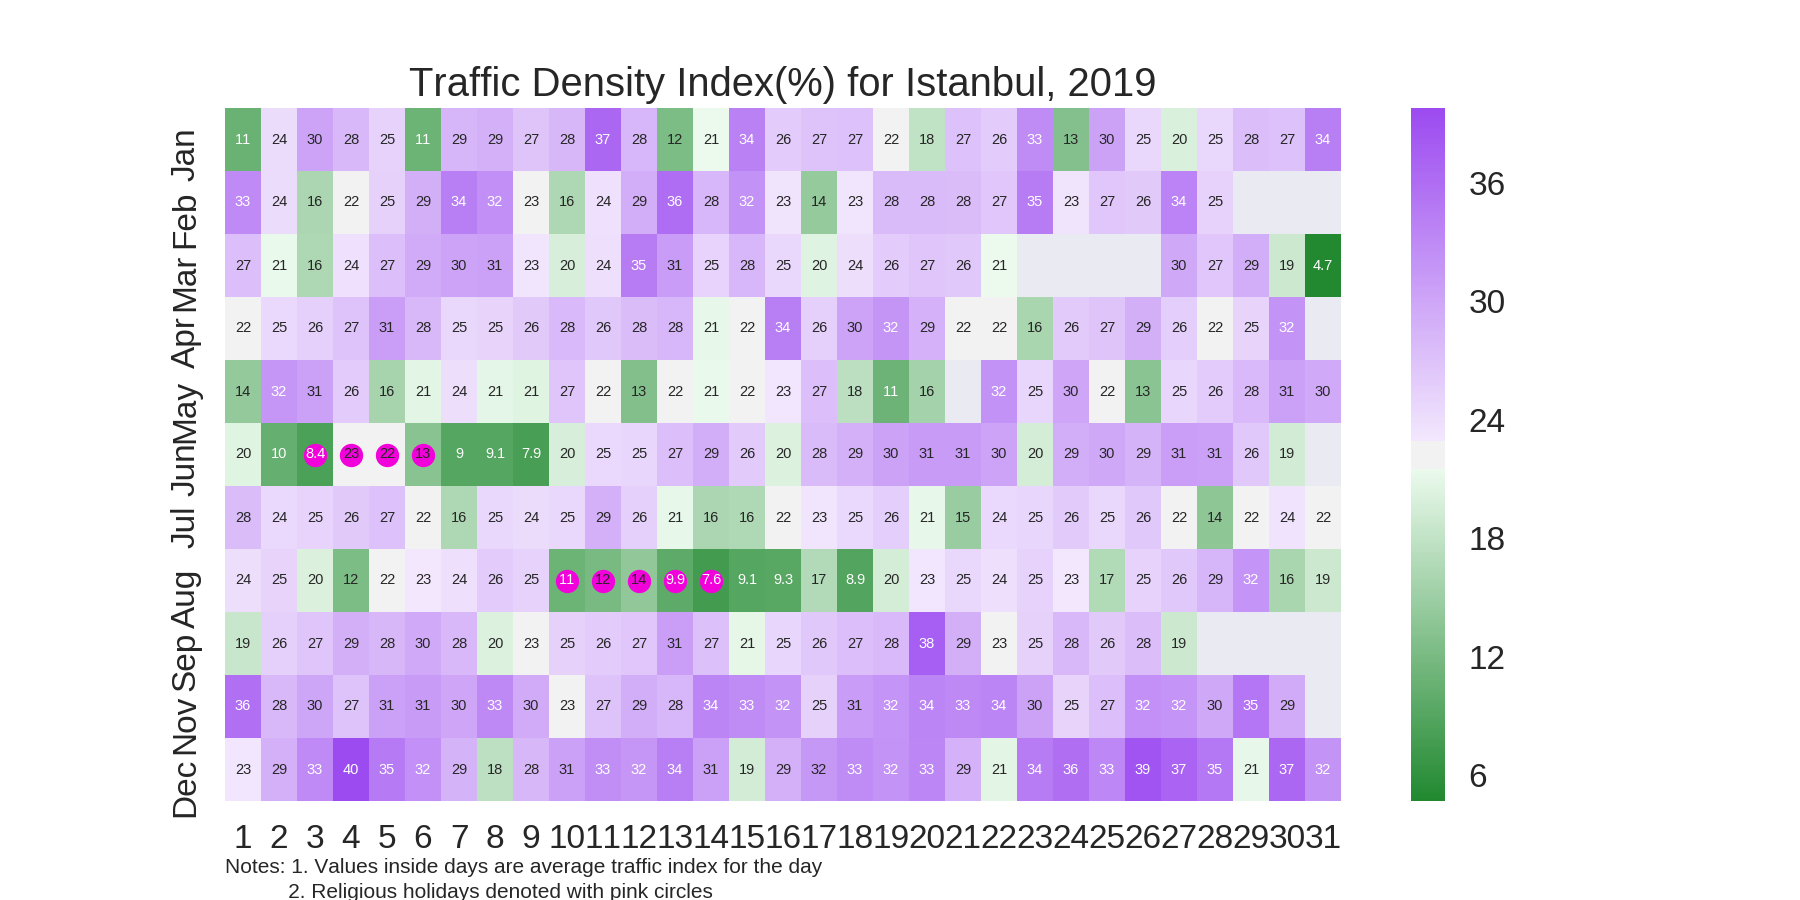

In [30]:
#Reaaranging mean index by month to use in the heatmap correctly
mean_by_day=df_d.pivot(index='month',columns='day',values='Traffic Index')
by_holiday=df_d.pivot(index='month',columns='day',values='religious')
sns.set(context='poster')
f, ax = plt.subplots(figsize=(12,6))
clr=sns.diverging_palette(130, 280, s=90, l=50,center='light', as_cmap=True)
# Heatmap
p = sns.heatmap(mean_by_day,annot=True,annot_kws={"size": 7},cmap=clr)
p.set(xlabel="", ylabel="")
p.set_title('Traffic Density Index(%) for Istanbul, 2019')
p.text(plt.xlim()[0], plt.ylim()[0]-1.2, "Notes: 1. Values inside days are average traffic index for the day", ha ='left', fontsize = 10,verticalalignment='bottom')
p.text(plt.xlim()[0],plt.ylim()[0]-1.6,"           2. Religious holidays denoted with pink circles",ha='left',fontsize=10,verticalalignment='bottom')
#Marking religious holidays on the heatmap
for i in range(0,11):
    for j in range(0,30):
        if not (np.isnan(by_holiday.values[i][j])):
            if by_holiday.values[i][j]==1:
                ax.plot(j+0.5, 11-i-0.5, color='#f202da', marker='o')
plt.savefig('densityheatmap.png')
plt.show()


**Comments:<br> As clearly seen in the heatmap religious holidays has lower traffic index and they also effect days before and after the holidays as working people usually extend the holiday using their annual leave. <br>
In 2019, we do not see high traffic the day before the holidays or the day after the holidays as it is the case in some holidays.**

## Conclusion
By using 2019 Traffic index for Istanbul, I tried to test the general belief that residents of Istanbul leave Istanbul in religious holidays hence leading a lower traffic in holidays but higher traffic in the days just before or after the holidays. 
I conclude that the traffic in Istanbul significantly less in religious holidays, however we can not conclude about people leaving Istanbul since we do not have higher traffic in the days before holidays. <br>
Lastly, I acknowledge that only having 1 year data which is not even on main roads level is leaving us a very primitive analysis but we can at least see the lower traffic rates in general in holidays.